# TELCO CHURN


## Goal:

    -Discover the drivers of churn in the telco data set
    -use thise drivers to make a model that predicts whether or not a customer will churn.

## Imports:    

In [1]:
from prepare import prep_telco_data
import acquire 
import env 
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import scipy.stats as stats
from scipy.stats import  chi2_contingency
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## Acquire
    -Data acquired from Telco Data Set
    -It contained 7043 rows and 21 columns before cleaning
    -Each row represents a customer ID
    -Each column represents a feature of that customer

##  Prepare

### Prepare Actions:
```
Removed columns that did not contain useful information
Renamed columns to promote readability
Checked for nulls in the data 
Checked that column data types were appropriate
Removed white space from values in object columns
Added Target column 'has_churned' indicating whether the has churned or not
Encoded categorical variables
Split data into train, validate and test (approx. 50/30/20), stratifying on 'churn'
Scaled continuous variable
Outliers have not been removed for this iteration of the project
```

## Data Dictionary

| Attribute | Definition | Data Type |
| ----- | ----- | ----- |
| total_charges | total accumulated charges| float |
| monthly_charges|customers charges monthly | float |
| tenure |months a customer has been with company |int |
| gender_female |customer is or is not female | int |
| gender |sex of customer |  object
| senior_citizen   |customer stats of senior or not senior | int64
| partner  | has partner or does not |  int64
| dependents  |does customer have dependents |  int64
|     phone_service |customer purchsed phone service |    int64
|    multiple_lines |customer has multiple lines |   object
|   online_security |customer signed up for online security |   object
|     online_backup |customer opt in to online backup|   object
| device_protection |customer is enrolled in device protection |   object
|      tech_support |customer opt in for tech support |   object
|      streaming_tv |customer signed up for streaming television |   object
|  streaming_movies |customer signed up for streaming movies |   object
| paperless_billing |enrolled in e-bill |    int64
|           churn   |customer is active or is not active | object
|    contract_type  |service contract customer selected |  object
|internet_service_type |info for what kind of internet service customer chose  |  object
| payment_type | info for customer preffered payment method |  object
| has_churned  | whether a customer has churned |  int64
|multiple_lines_No phone service  |multiple phone lines  | uint8
|                   multiple_lines_Yes  | multiple lines  | uint8
|  online_security_No internet service  | customer doesnt have online security  | uint8
|                  online_security_Yes  | customer has online security  | uint8
|    online_backup_No internet service  | customer does not have online back up  | uint8
|                    online_backup_Yes  | customer has online back up  | uint8
|device_protection_No internet service  | customer does not have device protection  | uint8
|                device_protection_Yes  |  customer does have device protection | uint8
|     tech_support_No internet service  | customer does not have tech support  | uint8
|                     tech_support_Yes  | customer has tech support  | uint8
|     streaming_tv_No internet service  | customer does not have tv streaming  | uint8
|                     streaming_tv_Yes  | customer can stream tv  | uint8
| streaming_movies_No internet service  |  customer cannot stream movies | uint8
|                 streaming_movies_Yes  |customer is able to stream movies   | uint8
|               contract_type_One year  | customer is on a one year contract  | uint8
|               contract_type_Two year  | customer is on a two year contract  | uint8
|    internet_service_type_Fiber optic  | customer has fiber internet  | uint8
|           internet_service_type_None  |  customer does not have internet | uint8
| payment_type_Credit card (automatic)  |  customer pays via credit card | uint8
|        payment_type_Electronic check  | customer pays via e-check  | uint8
|            payment_type_Mailed check  | customer pays with mail-in check  | uint8
**


# Quick Data Preview

In [2]:
df = acquire.new_telco_data()

In [3]:
train, validate, test = prep_telco_data(df)

Train:(3937, 44)
Test:(1407, 44)
Val: (1688, 44)
Train Telco Data:
(3937, 44)
     customer_id  gender  senior_citizen  partner  dependents  tenure  \
5919  8331-ZXFOE  Female               0        0           0      58   
1915  2790-XUYMV    Male               0        0           1      71   
5054  7107-UBYKY  Female               0        1           1      35   
2355  3373-YZZYM    Male               0        1           1       1   
6279  8883-GRDWQ    Male               1        0           0      20   
...          ...     ...             ...      ...         ...     ...   
394   0581-MDMPW  Female               0        0           0      24   
3763  5299-RULOA  Female               0        1           1      10   
3444  4883-KCPZJ  Female               0        1           1      22   
1002  1452-KIOVK    Male               0        0           1      22   
4192  5919-VCZYM    Male               0        0           0       2   

      phone_service multiple_lines      onlin

In [4]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,8331-ZXFOE,Female,0,0,0,58,1,Yes,Yes,Yes,...,0,0,0,1,0,0,0,1,0,0
1915,2790-XUYMV,Male,0,0,1,71,1,Yes,Yes,Yes,...,0,0,0,1,0,1,0,1,0,0
5054,7107-UBYKY,Female,0,1,1,35,1,Yes,No internet service,No internet service,...,0,1,0,0,0,0,1,0,1,0
2355,3373-YZZYM,Male,0,1,1,1,1,No,No internet service,No internet service,...,0,1,0,0,0,0,1,0,0,1
6279,8883-GRDWQ,Male,1,0,0,20,1,No,Yes,No,...,0,0,0,1,0,0,0,0,0,1


## Data Summary

In [5]:
train.describe()

,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,churn,has_churned,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
count,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,...,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000
mean,0.161290,0.485141,0.302769,32.775210,0.905258,0.590297,64.805131,2316.775641,0.265685,0.265685,...,0.386335,0.220218,0.391415,0.207010,0.243078,0.437389,0.220218,0.227330,0.327407,0.226314
std,0.367845,0.499843,0.459514,24.709604,0.292896,0.491841,30.294804,2284.984394,0.441753,0.441753,...,0.486971,0.414447,0.488129,0.405215,0.428997,0.496127,0.414447,0.419161,0.469327,0.418498
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.850000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,34.700000,396.100000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,30.000000,1.000000,1.000000,70.250000,1414.800000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,56.000000,1.000000,1.000000,90.300000,3893.600000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.650000,8594.400000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Explore

## No Churn VS Churn

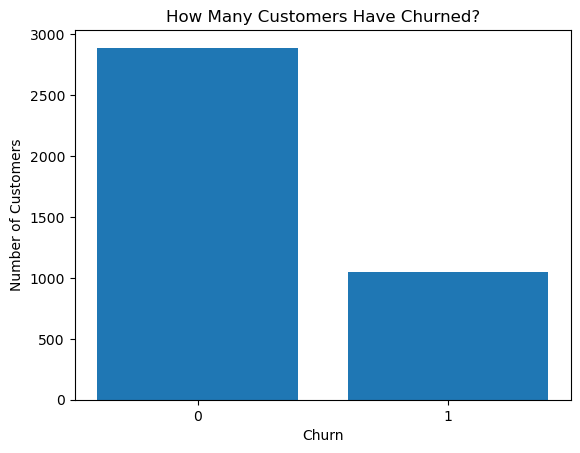

In [30]:
train_churn_value_counts = train.churn.value_counts()
plt.bar(train_churn_value_counts.index, train_churn_value_counts.values)
plt.title("How Many Customers Have Churned?")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.xticks([0, 1])
plt.show()

 -Approximately 26% of total customers have churned

## Does Sex effect Churn?

<Axes: xlabel='has_churned', ylabel='gender_female'>

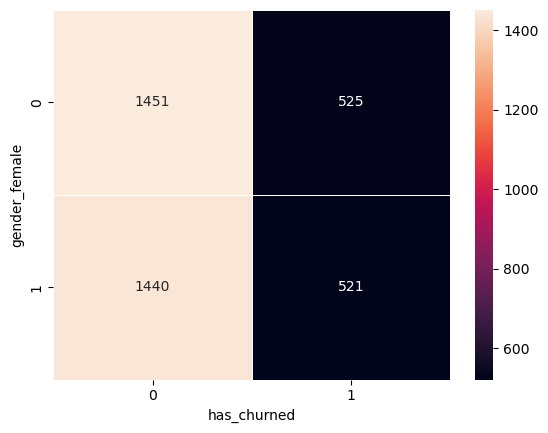

In [29]:
contingency_table = pd.crosstab(train['gender_female'], train['has_churned'])
contingency_table

sns.heatmap(contingency_table, annot = True, fmt ='d', linewidths = .5)